In [1]:
# Import other modules not related to PySpark
import os
import sys 
import seaborn as sns 
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline  

In [38]:
df_grp = pd.read_csv('Groupes.csv' , delimiter=';')


,GROUP_ID,Groupe,Nom du responsable,Niveau du groupe,Pays,Alerte Mail,Employee du groupe,Type groupe,Profil manager,Date de fin,Courriel,Train,E_IS_SHARED_SERVICE,Commentaire,GROUP_SP,Unnamed: 15


In [42]:
df_grp[df_grp['Groupe'].str.contains('Analytics')==True] 

,GROUP_ID,Groupe,Nom du responsable,Niveau du groupe,Pays,Alerte Mail,Employee du groupe,Type groupe,Profil manager,Date de fin,Courriel,Train,E_IS_SHARED_SERVICE,Commentaire,GROUP_SP,Unnamed: 15
7963,8132,DHL_VAL_PRO_SHP:Analytics,NaN,8,France,1,NaN,DHL,NaN,NaN,NaN,NaN,NaN,Création du groupe suite à la création profil ...,DHL_VAL_PRO_SHP:Analytics,NaN


In [2]:
df = pd.read_csv('All incidents DATA.csv' , sep=";")
df['[Description courte incident]'].isnull().sum() / len(df) 

0.0

In [4]:
df_model = df[['[Description courte incident]' , 'IDApplication' ]]
df_model['IDApplication'] = df_model['IDApplication'].str.split('|').str[-1]
df_model= df_model[(df_model['[Description courte incident]'] =='-') == False ]


C:\Users\ahmed\AppData\Local\Temp\ipykernel_3908\2814182770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['IDApplication'] = df_model['IDApplication'].str.split('|').str[-1]


In [6]:
df_model[df_model['IDApplication'].isin(['BUO' , 'PDE' , 'QLS'])]    

,[Description courte incident],IDApplication
56,soucis d'acc�s � qliksense,QLS
126,Acc�s portail d�cisionnel,PDE
130,Probl�me d'acc�s au portail d�cisionnaire,PDE
139,Redescente des ouvertures dans FAN,QLS
247,Acc�s Qliksense Courtage,QLS
...,...,...
308652,Acc�s bloqu� aux documents sur BO,BUO
308659,Ecart entre la requ�te et les donn�es Cassiopa...,BUO
308712,URGENT : probl�me de chargement de donn�es / r...,BUO
308747,�tat d�taill�e des comptes d'attente CLUB,BUO


In [18]:
df_model['[Description courte incident]'] = df_model['[Description courte incident]'].str.replace('�', 'e')
df_model 

,[Description courte incident],IDApplication
0,PROBLEME DE DESCENTE CASSIOPAE,GDC
1,Notification dossier,GDC
2,configuration ibm,
3,2e mobile sur IBM,
4,ecran externe non reconnu,
...,...,...
338988,Droits d'acces expostion BPI france,
342036,incident trop vieux pour etre pris en compte,ESP
396272,merci d'affecter les incidents e temps et pour...,ESP
396940,merci de ne pas nous affecter des incidents da...,ESP


In [46]:
df_model = df_model[(df_model['IDApplication'] =='' ) ==False ]

In [47]:
df_model

,[Description courte incident],IDApplication
0,PROBLEME DE DESCENTE CASSIOPAE,GDC
1,Notification dossier,GDC
5,Versioning contrat,PHX
6,NOTIFICATION E TRESO,TRE
7,Avance+ : La gestion de la ligne,TRE
...,...,...
335735,Profil DHL,DHL
342036,incident trop vieux pour etre pris en compte,ESP
396272,merci d'affecter les incidents e temps et pour...,ESP
396940,merci de ne pas nous affecter des incidents da...,ESP


<Figure size 1152x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

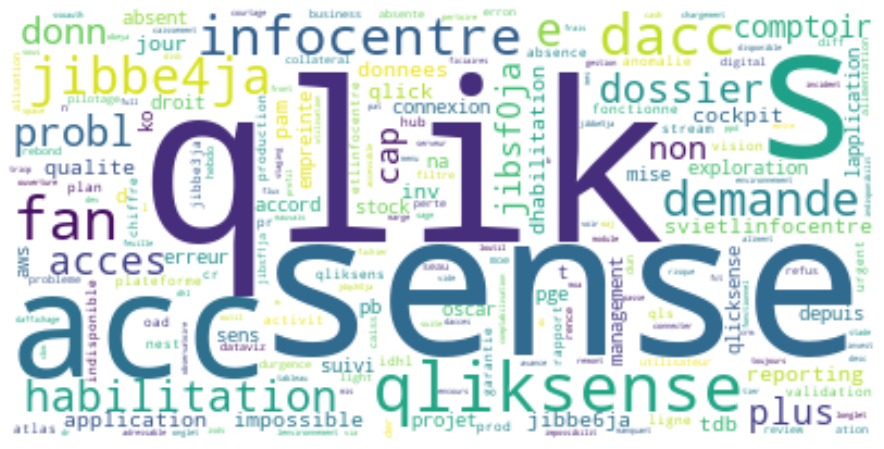

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df_model_wc = df_model[df_model['IDApplication'] =='QLS' ]

# Concatenate strings in the 'Réponse' column into a single string
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('french'))  # Adjust language as needed
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Clean the text in the 'Réponse' column
cleaned_text = df_model_wc['[Description courte incident]'].apply(clean_text)

# Concatenate cleaned text into a single string
cleaned_text_combined = ' '.join(cleaned_text)

# Generate the word cloud
wordcloud = WordCloud(collocations=False, background_color='white').generate(cleaned_text_combined)

# Plot the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
from collections import Counter


df_model_wc['[Description courte incident]'] = df_model_wc['[Description courte incident]'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_model_wc['[Description courte incident]'] for item in sublist])
temp = pd.DataFrame(top.most_common(30))
temp.columns = ['Common_words','count']     
temp.style.background_gradient(cmap='Blues')     

C:\Users\ahmed\AppData\Local\Temp\ipykernel_3908\1030914842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_wc['[Description courte incident]'] = df_model_wc['[Description courte incident]'].apply(lambda x:str(x).split())


,Common_words,count
0,Qlik,231
1,Sense,204
2,�,113
3,de,107
4,Acc�s,104
5,-,72
6,FAN,63
7,d'acc�s,60
8,Infocentre,60
9,dans,57


In [76]:
df_merged = pd.read_csv('merged3.csv' , sep=";")
df_merged['Code Appli'] = df_merged['Code Appli'].str.split('|').str[-1]
df_merged['Breve description'] = df_merged['Breve description'].str.replace('�', 'e')

df_merged.head(3)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16844\3042414485.py:1: DtypeWarning: Columns (14,15,16,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv('merged3.csv' , sep=";")


,Numero ticket,Breve description,Service Manager HELP,Nom appli,Date de creation,Duree de premier prise en charge,Date de resolution,Max Resolution Date,Type de ticket,Cause,Cause reelle,Action Name,Intervenant,Code Appli,Solution,Groupe,Entite du responsable du groupe de la derniere action,Priorite,Beneficiaire,Statut
0,I240215_0301,PROBLEME DE DESCENTE CASSIOPAE,https://com15.easyvista.com/autoconnect_mail.p...,OAD Octroi - GDC,15/02/2024 16:31:00,Non Renseign�e,15/02/2024 17:18:00,16/02/2024 :,Assistance,Manque d'information,Manque d'information,-,-,GDC,NaN,NaN,NaN,NaN,NaN,NaN
1,I240215_0299,Notification dossier,https://com15.easyvista.com/autoconnect_mail.p...,OAD Octroi - GDC,15/02/2024 16:23:00,Non Renseign�e,15/02/2024 16:53:00,16/02/2024 :,Assistance,Erreur d�utilisation applicative,Erreur d�utilisation applicative,-,-,GDC,NaN,NaN,NaN,NaN,NaN,NaN
2,I240215_0271,configuration ibm,https://com15.easyvista.com/autoconnect_mail.p...,-,15/02/2024 15:46:00,Non Renseign�e,15/02/2024 15:47:00,21/02/2024 :,Assistance,Manque d'information,Manque d'information,-,-,,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_model  =df_merged[ (df_merged['Code Appli'].isin(['QLS' ,'BUO' ,'PDE' ])) & ((df_merged['Breve description'] =='-') == False ) ][['Breve description' , 'Code Appli' ,  'Groupe' ]]

<Figure size 1152x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

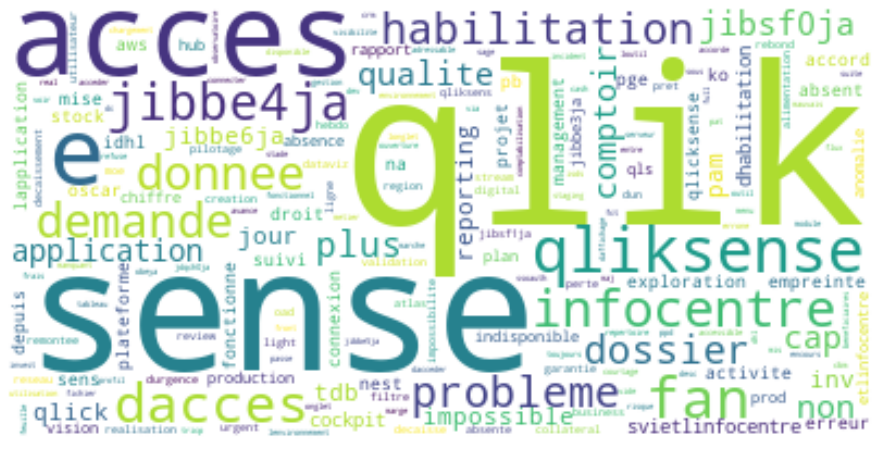

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df_model_wc = df_model[df_model['Code Appli'] =='QLS' ]

# Concatenate strings in the 'Réponse' column into a single string
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('french'))  # Adjust language as needed
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Clean the text in the 'Réponse' column
cleaned_text = df_model_wc['Breve description'].apply(clean_text)

# Concatenate cleaned text into a single string
cleaned_text_combined = ' '.join(cleaned_text)

# Generate the word cloud
wordcloud = WordCloud(collocations=False, background_color='white').generate(cleaned_text_combined)

# Plot the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Figure size 1152x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

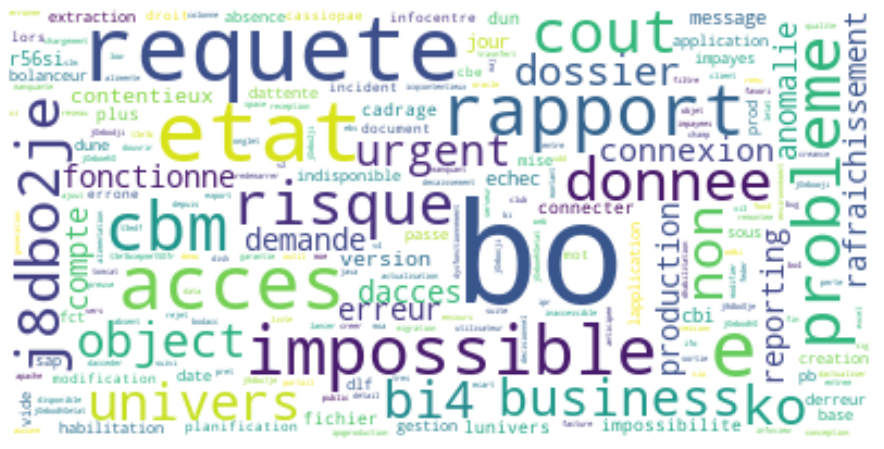

In [17]:
df_model_buo = df_model[df_model['Code Appli'] =='BUO' ]
cleaned_text = df_model_buo['Breve description'].apply(clean_text)

# Concatenate cleaned text into a single string
cleaned_text_combined = ' '.join(cleaned_text)

# Generate the word cloud
wordcloud = WordCloud(collocations=False, background_color='white').generate(cleaned_text_combined)

# Plot the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [28]:
df_merged = df_merged[(df_merged['Code Appli']=='')==False] 

In [57]:
len(df_merged[(df_merged['Code Appli']=='PRT') & (df_merged['Breve description']=='-') ]) / len(df_merged[df_merged['Code Appli']=='PRT' ])

0.3547255927863743

In [37]:
df_merged['Groupe'].value_counts() 

COM BCP BASE CLIENT PARTENAIRE         6119
DATA CORE BANKING                      1287
DATA RISQUES                            954
DATA PROD                               784
DATA REPORTING                          337
DATA FINANCE CDG                        236
DATA QUALIF                             199
BAE INFOCENTRE ASSURANCE EXPORT MOE     166
DSI INTUIZ                              139
DATA AE                                 107
DATA INVEST                              33
Titrisation DATA                         16
DATA IA                                   2
DEC PROJET BII-IFO                        2
DEC Dispatcher                            1
DEC ZDP                                   1
PCR QLS DAR TECHNIQUE                     1
DEC SDD                                   1
DATA PLATEFORME BIGDATA                   1
DEC MOA                                   1
COM MAO                                   1
Name: Groupe, dtype: int64

In [41]:
from collections import Counter


df_model_buo['Breve description'] = df_model_buo['Breve description'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_model_buo['Breve description'] for item in sublist])
temp = pd.DataFrame(top.most_common(50))
temp.columns = ['Common_words','count']     
temp.style.background_gradient(cmap='Blues')  

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16844\3312981598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_buo['Breve description'] = df_model_buo['Breve description'].apply(lambda x:str(x).split())


,Common_words,count
0,BO,815
1,de,436
2,-,249
3,e,173
4,du,168
5,ne,156
6,des,137
7,CBM,124
8,requete,118
9,sur,111


In [16]:
from collections import Counter


df_model_wc['Breve description'] = df_model_wc['Breve description'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_model_wc['Breve description'] for item in sublist])
temp = pd.DataFrame(top.most_common(50))
temp.columns = ['Common_words','count']     
temp.style.background_gradient(cmap='Blues')     

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16844\1328029150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_wc['Breve description'] = df_model_wc['Breve description'].apply(lambda x:str(x).split())


,Common_words,count
0,"'Qlik',",207
1,"'Sense',",166
2,"'e',",112
3,"['Acces',",107
4,"'de',",107
5,"'-',",72
6,"'dans',",57
7,"['JIBBE4JA',",56
8,'Infocentre'],56
9,"""d'acces"",",54


In [66]:
df_model[df_model['Groupe'] =='DATA CORE BANKING' ]      

,Breve description,Code Appli,Groupe
66581,extraction SUB ou AR < 50Ke,PDE,DATA CORE BANKING
67419,Acces chiffres Reseaux Ouest,PDE,DATA CORE BANKING
67848,Rapport 55 - Rejets de prelevement,PDE,DATA CORE BANKING
67876,451406 Entree en vigueur mais ne remonte pas d...,BUO,DATA CORE BANKING
67918,Manque de lignes dans l'univers FCT Demo,BUO,DATA CORE BANKING
...,...,...,...
306684,fiche situation du dossier,PDE,DATA CORE BANKING
307001,Modification requete,BUO,DATA CORE BANKING
307429,mes requetes planifiees qui tournaient jusqu'e...,BUO,DATA CORE BANKING
307581,DOUBLONS ETAT BO COMPTE D ATTENTE WEB DATE VAL...,BUO,DATA CORE BANKING


In [71]:
df_model['Groupe'].fillna('Analytics' , inplace=True)

In [73]:
df_model['Groupe'].value_counts()

Analytics                              2670
DATA CORE BANKING                       299
DATA REPORTING                          184
DATA QUALIF                              67
DATA RISQUES                             28
DATA AE                                  24
DATA INVEST                              18
DATA FINANCE CDG                         15
DATA PROD                                 5
BAE INFOCENTRE ASSURANCE EXPORT MOE       2
DEC Dispatcher                            1
COM BCP BASE CLIENT PARTENAIRE            1
Name: Groupe, dtype: int64

In [82]:
df_COMBCP = df_merged[ (df_merged['Groupe'] =='COM BCP BASE CLIENT PARTENAIRE' ) & (( df_merged['Breve description']=='-' )==False) ][['Breve description' , 'Code Appli' ,  'Groupe' ]]

In [92]:
from collections import Counter


df_COMBCP['Breve description'] = df_COMBCP['Breve description'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_COMBCP['Breve description'] for item in sublist])
temp = pd.DataFrame(top.most_common(50))
temp.columns = ['Common_words','count']     
temp.style.background_gradient(cmap='Blues')  

,Common_words,count
0,de,631
1,CP,403
2,-,267
3,la,242
4,dans,239
5,BCP,227
6,e,212
7,sur,159
8,creation,153
9,impossible,142


In [84]:
df_analytics = df_model[df_model['Groupe']=='Analytics']

In [88]:
df_full = pd.concat([df_analytics, df_COMBCP])

# Reset index if needed
df_full.reset_index(drop=True, inplace=True)

df_full

,Breve description,Code Appli,Groupe
0,soucis d'acces e qliksense,QLS,Analytics
1,Acces portail decisionnel,PDE,Analytics
2,Probleme d'acces au portail decisionnaire,PDE,Analytics
3,Redescente des ouvertures dans FAN,QLS,Analytics
4,Acces Qliksense Courtage,QLS,Analytics
...,...,...,...
5210,modification denomination sociale,BCP,COM BCP BASE CLIENT PARTENAIRE
5211,DEUX ENTITES AU NOM DE SELMONI SMART HANDLING,BCP,COM BCP BASE CLIENT PARTENAIRE
5212,INFOS MANQUANTES SUR SYNTHESE,BCP,COM BCP BASE CLIENT PARTENAIRE
5213,Inscription Code GICS entreprise MEAGOUEST,BCP,COM BCP BASE CLIENT PARTENAIRE


In [90]:
df_full.to_csv('df_model.csv',index=False)

In [91]:
df_full

,Breve description,Code Appli,Groupe
0,soucis d'acces e qliksense,QLS,Analytics
1,Acces portail decisionnel,PDE,Analytics
2,Probleme d'acces au portail decisionnaire,PDE,Analytics
3,Redescente des ouvertures dans FAN,QLS,Analytics
4,Acces Qliksense Courtage,QLS,Analytics
...,...,...,...
5210,modification denomination sociale,BCP,COM BCP BASE CLIENT PARTENAIRE
5211,DEUX ENTITES AU NOM DE SELMONI SMART HANDLING,BCP,COM BCP BASE CLIENT PARTENAIRE
5212,INFOS MANQUANTES SUR SYNTHESE,BCP,COM BCP BASE CLIENT PARTENAIRE
5213,Inscription Code GICS entreprise MEAGOUEST,BCP,COM BCP BASE CLIENT PARTENAIRE


In [75]:
df_merged['Groupe'].value_counts()

COM BCP BASE CLIENT PARTENAIRE         6315
DATA CORE BANKING                      1426
DATA RISQUES                           1067
DATA PROD                               794
DATA REPORTING                          346
DATA FINANCE CDG                        249
DATA QUALIF                             203
BAE INFOCENTRE ASSURANCE EXPORT MOE     169
DSI INTUIZ                              139
DATA AE                                 108
DATA INVEST                              33
Titrisation DATA                         16
DATA IA                                   2
DEC PROJET BII-IFO                        2
DATA PLATEFORME BIGDATA                   2
DEC Dispatcher                            1
DEC ZDP                                   1
PCR QLS DAR TECHNIQUE                     1
DEC SDD                                   1
DEC MOA                                   1
COM MAO                                   1
Name: Groupe, dtype: int64

In [2]:
!pip install nltk transformers 

In [3]:
import pandas as pd
import re
import string 
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import torch 
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



RuntimeError: Failed to import transformers.models.bert.modeling_bert because of the following error (look up to see its traceback):
[WinError 182] The operating system cannot run %1. Error loading "c:\Users\ahmed\anaconda3\lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.